# Decision Tree

決策樹在訓練過程中會從最後上方的樹根開始將資料的特徵將資料分割到不同邊<br>
分割的原則是：這樣的分割要能得到最大的資訊增益(Information gain, 簡稱IG)。

由於我們希望獲得的資訊量要最大，因此經由分割後的資訊量要越小越好。

常見的資訊量有兩種：熵(Entropy) 以及 Gini不純度(Gini Impurity)




## 載入Iris資料集

In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,sys
sys.path.append(os.path.abspath('./')) #for import common.utility
from utility import plot_confusion_matrix,plot_decision_regions,testcase_report

## 只用2個特徵進行分類
'sepal length (cm)', 'petal length (cm)'

In [2]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
#iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
#只取 target 0,2
iris_data = iris_data[iris_data['target'].isin([1,2])]
print(iris_data.shape)

target_names: ['setosa' 'versicolor' 'virginica']
(100, 5)


In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 將資料的70%拿出來train，剩下的30％用來檢測train的好壞

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.drop(['target'],axis=1), iris_data['target'], test_size=0.3,random_state = 1)

# Decision Tree 不需要做特徵標準化

In [5]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

## DecisionTreeClassifier 參數
    criterion: entropy, gini impurity
    max_depth : 主要是可以防止樹長得過高造成overfit
    max_features: 最多只能挑K種feature去分類
    min_samples_leaf: leaf node最小sample數
    

In [6]:
from sklearn.tree import DecisionTreeClassifier

### use entropy as a criterion

In [18]:
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=12,random_state=0) #max_depth=1,3,12

### class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)

In [19]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=0)

## 計算正確率

In [20]:
print('training score:',clf.score(X_train,y_train))
print('test score:',clf.score(X_test,y_test))

training score: 1.0
test score: 0.8666666666666667


In [21]:
clf.predict(X_test)

array([2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1])

In [22]:
y_test.values

array([2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 1])

### training Report

In [24]:
report=testcase_report(iris_data,clf,X_train,X_train,y_train)
report[0]

accuracy: 1.0
error_index : []
miss classification : []
number of errors :0/70
error data index: Index([], dtype='int64')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred


###  test Report

In [25]:
report=testcase_report(iris_data,clf,X_test,X_test,y_test)
report[0]

accuracy: 0.8666666666666667
error_index : [ 2 12 21 27]
miss classification : [2 1 1 2]
number of errors :4/30
error data index: Index([83, 106, 123, 77], dtype='int64')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred
83,6.0,2.7,5.1,1.6,1,2
106,4.9,2.5,4.5,1.7,2,1
123,6.3,2.7,4.9,1.8,2,1
77,6.7,3.0,5.0,1.7,1,2


## 樹視覺化

　scikit-learn中决策树的可视化一般需要安装graphviz。主要包括graphviz的安装和python的graphviz插件的安装。

　　　　(可省略)安装graphviz。下載windows GraphViz's 工具  https://graphviz.gitlab.io/_pages/Download/Download_windows.html

　　　　安装python插件graphviz： conda install graphviz

　　　　安装python插件pydotplus。 conda install pydotplus

　　　　这样环境就搭好了，有时候python会很笨，仍然找不到graphviz，这时，可以在代码里面加入这一行：

　　　　os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
    
    
### Open "command or conda prompt" and run:

#### conda update conda
#### conda update anaconda

　　　　

In [26]:
from sklearn.tree import export_graphviz
from sklearn import tree
import os
os.environ['PATH'] = os.environ['PATH'] + (';c:\\Program Files (x86)\\Graphviz2.38\\bin\\')

### 方法1：使用 pydotplus 直接生成 iris.pdf

In [27]:
import pydotplus
dot_data=tree.export_graphviz(clf,out_file=None)
graph=pydotplus.graph_from_dot_data(dot_data)
if not os.path.exists('output'):
    os.mkdir('output')
graph.write_pdf('output/iris.pdf')

True

### 方法2：直接在 jupyter notebook 中生成

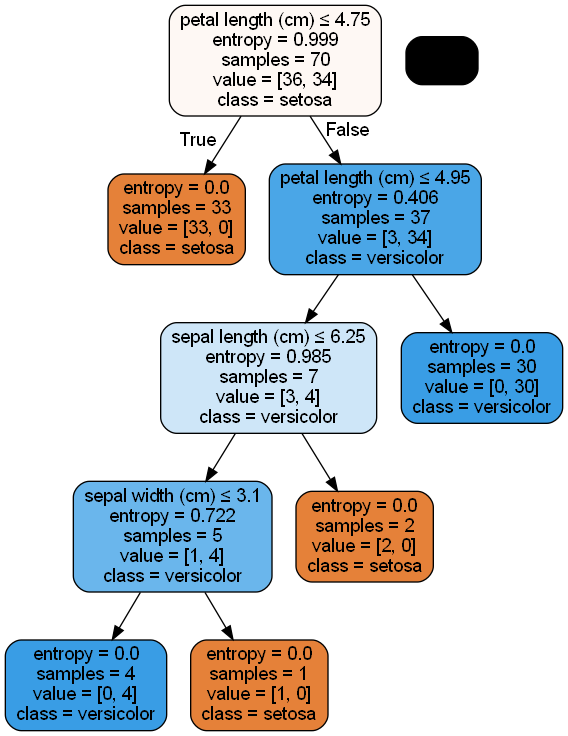

In [28]:
from IPython.display import Image  
#將 Decisson Tree Classifier 放入
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=iris['feature_names'],  
                         class_names=iris.target_names,
                         filled=True, rounded=True,  
                         special_characters=True)   
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

## Return the feature importances.

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It

In [29]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
clf.feature_importances_

array([0.04698419, 0.05159668, 0.90141913, 0.        ])

### use gini index as a criterion

In [35]:
clf_2 = DecisionTreeClassifier(criterion = 'gini', random_state=0,max_depth=12)

In [36]:
X_train.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
117,7.7,3.8,6.7,2.2
149,5.9,3.0,5.1,1.8
104,6.5,3.0,5.8,2.2
145,6.7,3.0,5.2,2.3
138,6.0,3.0,4.8,1.8


In [37]:
clf_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12, random_state=0)

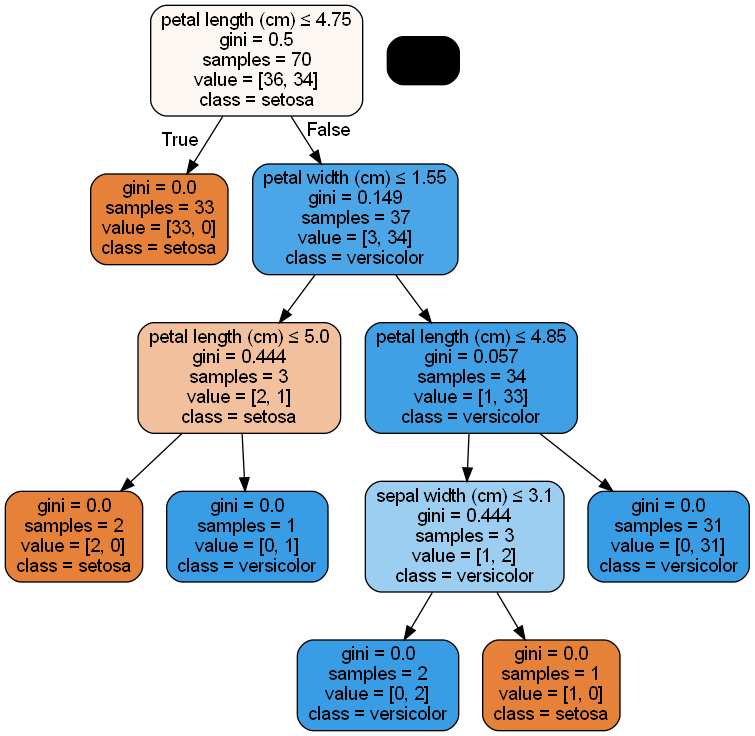

In [38]:
from IPython.display import Image  
#將 Decisson Tree Classifier 放入
dot_data = tree.export_graphviz(clf_2, out_file=None,
                         feature_names=iris['feature_names'],  
                         class_names=iris.target_names,
                         filled=True, rounded=True,  
                         special_characters=True)   
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

# 只挑2個特徵進行分類
petal width (cm)','petal length (cm)

In [39]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['petal width (cm)','petal length (cm)','target']]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,petal width (cm),petal length (cm),target
0,0.2,1.4,0
1,0.2,1.4,0
2,0.2,1.3,0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['petal width (cm)','petal length (cm)']], iris_data['target'], test_size=0.3, random_state=0)

In [41]:
from sklearn.tree import DecisionTreeClassifier
clf_3 = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, random_state=0)
clf_3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

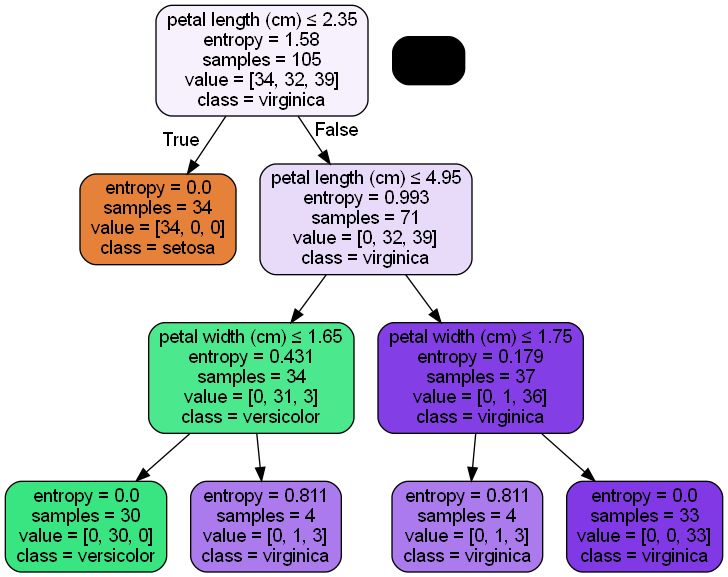

In [42]:
from IPython.display import Image  
#將 Decisson Tree Classifier 放入
dot_data = tree.export_graphviz(clf_3, out_file=None,
                         feature_names=['petal width (cm)','petal length (cm)'],  
                         class_names=iris.target_names,
                         filled=True, rounded=True,  
                         special_characters=True)   
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

## 視覺化決策樹的決策邊界

C:\Users\wahas\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Python學習區\Unit05_2\utility.py:79: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


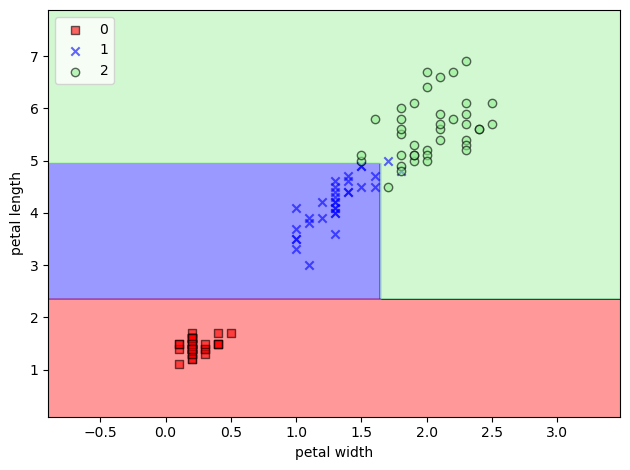

In [43]:
plot_decision_regions(X_train.values, y_train, classifier=clf_3)
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Random Forest 隨機森林分類器

* Step1. 建立特徵X，與目標y
* Step2. 將資料區分成訓練集與測試集，可自行設定區分的百分比
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
* Step3. 選擇隨機森林分類器，內容可決定決策數的棵樹、剪枝葉等等，以提升模型的效率及避免過度配適。
rfc=RandomForestClassifier(n_estimators=100,n_jobs = -1,random_state =50, min_samples_leaf = 10)
* Step4. 用建立好的模型來預測資料rfc.predict(X_test)
* Step5. 檢驗模型的正確率
rfc.score(X_test,y_test)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
forest = RandomForestClassifier(criterion='entropy', n_estimators=10,random_state=0,n_jobs=8) 

In [46]:
X_train.keys()

Index(['petal width (cm)', 'petal length (cm)'], dtype='object')

In [47]:
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=8,
                       random_state=0)

## 計算分數

In [48]:
print('training score:',forest.score(X_train,y_train))
print('test score:',forest.score(X_test,y_test))

training score: 0.9809523809523809
test score: 0.9555555555555556


In [49]:
report=testcase_report(iris_data,forest,X_train,X_train,y_train)
report[0]


accuracy: 0.9809523809523809
error_index : [11 74]
miss classification : [1 1]
number of errors :2/105
error data index: Index([106, 138], dtype='int64')


,petal width (cm),petal length (cm),target,pred
106,1.7,4.5,2,1
138,1.8,4.8,2,1


In [50]:
report=testcase_report(iris_data,forest,X_test,X_test,y_test)
report[0]

accuracy: 0.9555555555555556
error_index : [24 37]
miss classification : [1 2]
number of errors :2/45
error data index: Index([126, 83], dtype='int64')


,petal width (cm),petal length (cm),target,pred
126,1.8,4.8,2,1
83,1.6,5.1,1,2


C:\Users\wahas\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Python學習區\Unit05_2\utility.py:79: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


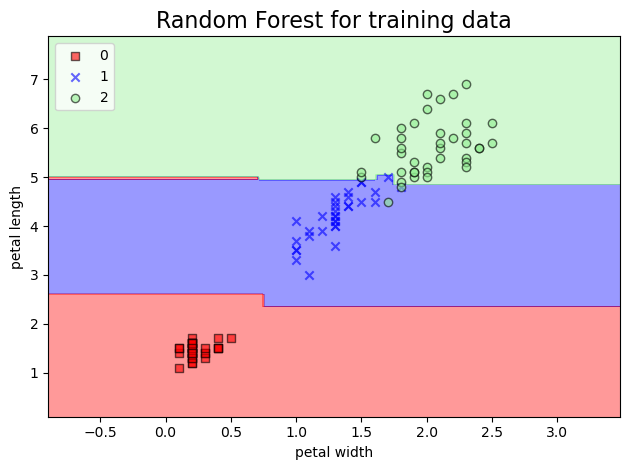

In [52]:
plot_decision_regions(X_train.values, y_train, classifier=forest)
plt.title('Random Forest for training data',fontsize=16)
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\wahas\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
D:\Python學習區\Unit05_2\utility.py:79: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


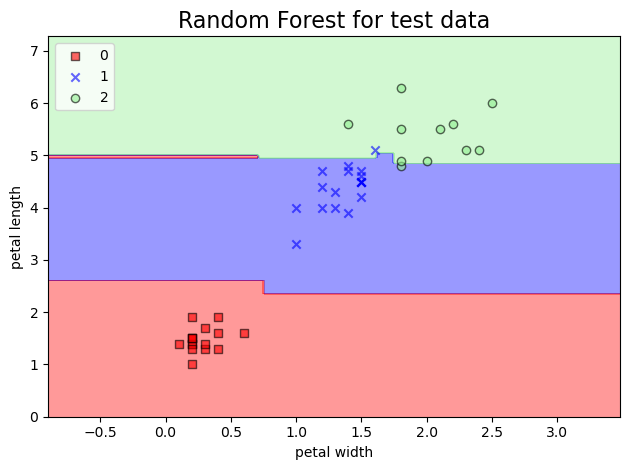

In [54]:
plot_decision_regions(X_test.values,y_test, classifier=forest)
plt.title('Random Forest for test data',fontsize=16)
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 利用RandomForest找出Iris data 的分類主要特徵

In [59]:
forest_1 = RandomForestClassifier(criterion='entropy', n_estimators=10,random_state=0,n_jobs=8) 

iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
#iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
#只取 target 0,2
#iris_data = iris_data[iris_data['target'].isin([1,2])]

iris_data.head()


target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(
     iris_data.drop(['target'],axis=1), iris_data['target'], test_size=0.3, random_state=0)

In [61]:
forest_1.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=8,
                       random_state=0)

In [62]:
importances = forest_1.feature_importances_#現在特徵的重要性
print(importances)
indices = np.argsort(importances)  #np.argsort :Returns the indices that would sort an array. 
print(indices)#排序索引(最小開始編號)

[0.13385803 0.02750716 0.38149926 0.45713555]
[1 0 2 3]


In [63]:
features =X_train.keys()
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [64]:
features[indices]

Index(['sepal width (cm)', 'sepal length (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

Index(['sepal width (cm)', 'sepal length (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


Text(0.5, 0, 'Relative Importance')

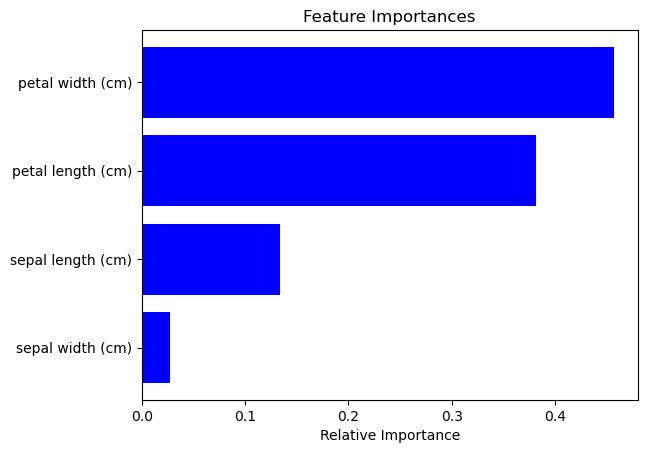

In [65]:
plt.figure(1)
print(features[indices])
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')